# OpenABM-Covid19 - Example Self-Isolation on Symptoms

This examples show how to run a simulation on 50k people and demonstrates the effect in the reduciton in incidence which occurs when people and their household self-isolate on symptoms.

First we set the get the baseline parameters, change the population to 50k and then intialise the simulation.

In [1]:
import example_utils as utils
import pandas as pd
import matplotlib.pyplot as plt

params = utils.get_baseline_parameters()
params.set_param( "n_total", 50000 )

sim   = utils.get_simulation( params )
model = sim.env.model

Now we run for 40 days.

In [2]:
sim.steps( 40 )
timeseries = pd.DataFrame( sim.results )

We now run a new simulation from scratch for 20 days (same seed an initial parameters).

In [3]:
del( model ); del( sim );
params = utils.get_baseline_parameters()
params.set_param( "n_total", 50000 )
sim   = utils.get_simulation( params )
model = sim.env.model

sim.steps( 20 )

At day 20 we introduce self-quarantine of 80% those who are sypmtomatic and quarantine all members of their household.

In [4]:
model.update_running_params("self_quarantine_fraction", 0.8 )
model.update_running_params("quarantine_household_on_symptoms", 1)
sim.steps( 20 )

Plot the number of daily new infections over the course of the simulation ad compare between with and without self-isolation.

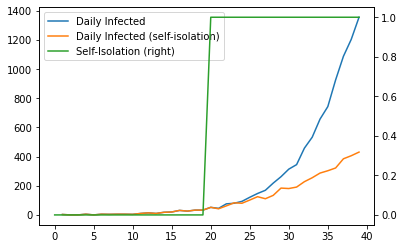

In [5]:
timeseries2 = pd.DataFrame( sim.results )
timeseries["daily_infected"] = timeseries["total_infected"].diff(1)
timeseries2["daily_infected_sd"] = timeseries2["total_infected"].diff(1)
df = pd.merge( timeseries, timeseries2, on = "time")
df["self_isolate"] = timeseries.apply(lambda X: 1 if ( X.time >20) & ( X.time <= 40 ) else 0, axis=1)

plt.figure()
df.daily_infected.plot( x = "time", legend = True, label = "Daily Infected" )
df.daily_infected_sd.plot( x = "time", legend = True, label = "Daily Infected (self-isolation)" )
df.self_isolate.plot( x = "time", legend = "True", secondary_y = True, label = "Self-Isolation" )